
**Anomaly Detection Algorithm using Gaussian Mixture Model**


.

##**Part 1: Getting started [2 Marks]**

We are going to work with a credit card fraud dataset. This dataset contains 28 key features, which are not 
directly interpretable but contain meaningful information about the dataset.

Load the dataset in CSV file using Pandas. The dataset is called `creditcard.csv`. Print out the first few columns of the dataset.

* How many rows are there? _284807____ **[0.1]**
* What features in the dataset are present aside from the 28 main features?  _Time,amount___ **[0.1]**
* Which column contains the targets? **[0.1]** The "class" column
* What is the meaning of target values?_0 means normal transaction,1 means fraud___ **[0.1]**

In [ ]:
pip install wget

  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9675 sha256=36b8d9632fd18e84f88a9be23249806e943eaf9a31ca3bbb93c40a589ae24664
  Stored in directory: /root/.cache/pip/wheels/a1/b6/7c/0e63e34eb06634181c63adacca38b79ff8f35c37e3c13e3c02
Successfully built wget


In [ ]:
import wget

wget.download('https://github.com/aps1070-2019/datasets/raw/master/creditcard.tar.gz','creditcard.tar.gz')

'creditcard.tar.gz'

In [ ]:
!tar -zxvf creditcard.tar.gz

creditcard.csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
df = pd.read_csv('creditcard.csv')

In [ ]:
### YOUR CODE HERE ###
print(df)

            Time         V1         V2  ...       V28  Amount  Class
0            0.0  -1.359807  -0.072781  ... -0.021053  149.62      0
1            0.0   1.191857   0.266151  ...  0.014724    2.69      0
2            1.0  -1.358354  -1.340163  ... -0.059752  378.66      0
3            1.0  -0.966272  -0.185226  ...  0.061458  123.50      0
4            2.0  -1.158233   0.877737  ...  0.215153   69.99      0
...          ...        ...        ...  ...       ...     ...    ...
284802  172786.0 -11.881118  10.071785  ...  0.823731    0.77      0
284803  172787.0  -0.732789  -0.055080  ... -0.053527   24.79      0
284804  172788.0   1.919565  -0.301254  ... -0.026561   67.88      0
284805  172788.0  -0.240440   0.530483  ...  0.104533   10.00      0
284806  172792.0  -0.533413  -0.189733  ...  0.013649  217.00      0

[284807 rows x 31 columns]


It's important to know how many examples we have for each class when we work with a new dataset.

* What is the percentage of entries in the dataset for each class? class 0:99.827%, class 1:0.173%____ **[0.1]**
* Is this data considered balanced or unbalanced? Why is this the case? The data is considered unbalanced, because the vast majority of the dataset is class 0, only 0.173% is class 1____ **[0.1]**
* Why is balance/imbalance important? How might this class ditribution affect a KNN classifier for example, which we explored in Project 1? _Balance/imbalance is important because it influences on the performance of a model. For example, if KNN classifier is applied to a imbalanced dataset, the model may be overfitting____ **[0.5]**
* What metrics should we use to evaluate a model in such cases _confusion matrix,F1-score,and ROC ________ **[0.2]**


In [ ]:
### YOUR CODE HERE ###

#Find the percentage of each class
classzero=df[df["Class"]==0]
percent_zero=(np.shape(classzero)[0]/284807)*100
print("The percentage of class being 0 is: ",percent_zero,"%")

classone=df[df["Class"]==1]
percent_one=(np.shape(classone)[0]/284807)*100
print("The percentage of class being 1 is: ",percent_one,"%")

The percentage of class being 0 is:  99.82725143693798 %
The percentage of class being 1 is:  0.1727485630620034 %


Next, split the dataset into a training (65%), validation (20%) and testing set (15%). Set the random state to 40. **[0.2]**

Make sure to separate out the column corresponding to the targets.

In [ ]:
### Split the data  ###
from sklearn.model_selection import train_test_split
target_data=df["Class"]
feature_data=df
val_size=0.2/0.85
trainsize=0.65/0.85
X_train, X_test, y_train, y_test = train_test_split(feature_data,target_data,test_size=0.15,random_state=40)
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train,test_size=val_size,random_state=40)



Now, let's take a look at the difference in distribution for some variables between fraudulent and non-fraudulent transactions:

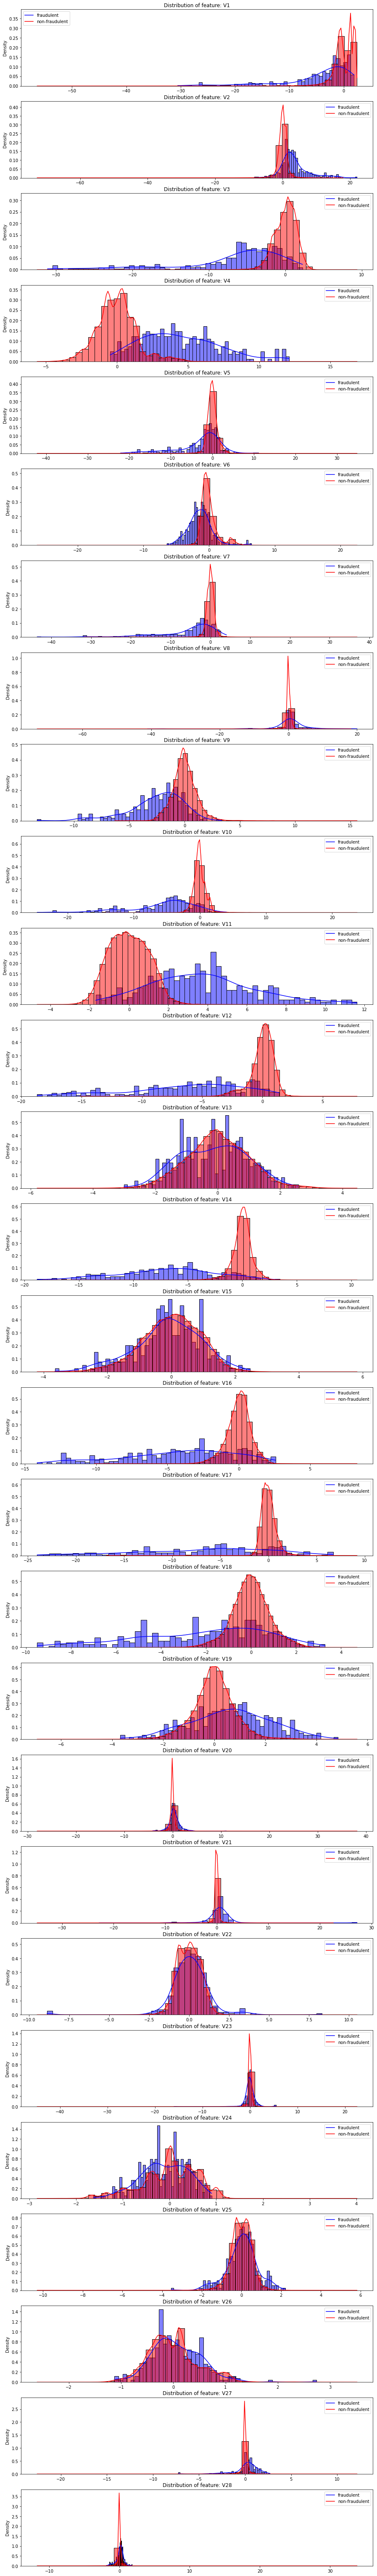

In [ ]:
import matplotlib.gridspec as gridspec
features=[f for f in df.columns if 'V' in f]
nplots=np.size(features)
plt.figure(figsize=(15,4*nplots))
gs = gridspec.GridSpec(nplots,1)
for i, feat in enumerate(features):
    ax = plt.subplot(gs[i])
    sns.histplot(X_train[feat][y_train==1], stat="density", kde=True, color="blue", bins=50)
    sns.histplot(X_train[feat][y_train==0], stat="density", kde=True, color="red", bins=50)
    ax.legend(['fraudulent', 'non-fraudulent'],loc='best')
    ax.set_xlabel('')
    ax.set_title('Distribution of feature: ' + feat)

Explain how these graphs could provide meaningful information about anomaly detection using a gaussian model. **[0.5]**

These graphs illustrate for each feature, the distribution of fradulent and non-fraudulent with respect to the feature value, and it can be seen from the graph for each feature the two Gaussian distribustion for fradulent and non-fradulent samples respectively.

## **Part 2: One Gaussian model with Single feature: [2 Marks]**
We'll start by making a prediction using **a single feature of our dataset at a time**. 

Please note that we **only use `V` features** in our model.

**a. Fitting regardless of class:**
  1. Fit a single Gaussian distribution on a single feature of **the full training dataset** (both classes) using ``sklearn.mixture.GaussianMixture`` when ``n_components=1``. Feature V1 is selected
  2. Compute AUC (Area under the ROC Curve) based on ``sklearn.mixture.GaussianMixture.score_samples`` on both the full training set and validation set (including both classes).  AUC of Gaussian Mixture on full training set 0.693,AUC of Gaussian Mixture on validation set 0.716
  3. Repeat the above steps for each of the features and present your findings in a table. **[0.3]**
  4. Find the best 3 features to distinguish fraudulent transactions from non-fraudulent transactions based on the AUC of the validation set. **[0.2]**The top 3 features is V14 V17 and V10, determined by the AUC of the validation set
  5. Make a prediction based on a model's scores: If the `score_samples` is lower than a threshold, we consider that transaction as a fraud. Find an optimal threshold that maximizes the F1 Score of the validation set for each of those 3 features separately. (Do not check every possible value for threshold, come up with a faster way!) Compute F1 score using `sklearn.metrics.f1_score`. **[0.5]** Optimal threshold for feature V14 is -20.274,Optimal threshold for feature V17 is -22.354,Optimal threshold for feature V10 is -27.188
  6. Report Precision, Recall and F1 score on both training and validation set in a table using the threshold you found in previous step. 
  For feature V14:
  The precision for training set is:  0.6466431095406361
  The recall for training set is:  0.5683229813664596
  The precision for validation set is:  0.6373626373626373
  The recall for validation set is:  0.6373626373626373
  The F1 score for training set is:  0.6049586776859505
  The F1 score for validation set is:  0.6010362694300517

  For feature V17:
  The precision for training set is:  0.6597510373443983
  The recall for training set is:  0.4937888198757764
  The precision for validation set is:  0.7183098591549296
  The recall for validation set is:  0.7183098591549296
  The F1 score for training set is:  0.5648312611012434
  The F1 score for validation set is:  0.5895953757225434

  For feature V10:
  The precision for training set is:  0.1807511737089202
  The recall for training set is:  0.2391304347826087
  The precision for validation set is:  0.19008264462809918
  The recall for validation set is:  0.19008264462809918
  The F1 score for training set is:  0.2058823529411765
  The F1 score for validation set is:  0.2062780269058296
  
  7. Report the complexity of your method (Big O notation) for determining the optimal threshold.**[0.3]** The complexity of the method for determining the optimal threshold is O(constant), because a few numbers of score samples is tested as threshold with the score sample list sorted and certain number(for example 10) is selected such that the 10th lowest score is set as the threshold.

**b. Fitting based on class:**
 1. Pick 3 features that had the best AUC in Part 2a. V14, V17, and V10
 2. repeat part 2a to compute AUC, F1 score, Precision and Recall when you fit a Gaussian **only on non-fraudulent transactions in the training set** in step 1 (instead of all the transactions).
The values with feature V14 is:
The AUC for training set is:  0.9483174296501111
The AUC for validation set is:  0.9549150648652004
The F1score for training set is:  0.5815384615384616
The F1score for validation set is:  0.6039603960396039
The precision for training set is:  0.5762195121951219
The recall for training set is:  0.5869565217391305
The precision for validation set is:  0.61
The recall for validation set is:  0.61
The values with feature V17 is:
The AUC for training set is:  0.9283978996241752
The AUC for validation set is:  0.9252667370148904
The F1score for training set is:  0.5705128205128205
The F1score for validation set is:  0.5876288659793814
The precision for training set is:  0.5894039735099338
The recall for training set is:  0.5527950310559007
The precision for validation set is:  0.6195652173913043
The recall for validation set is:  0.6195652173913043
The values with feature V10 is:
The AUC for training set is:  0.9101690752728779
The AUC for validation set is:  0.9172668680556992
The F1score for training set is:  0.20428751576292561
The F1score for validation set is:  0.20338983050847456
The precision for training set is:  0.17197452229299362
The recall for training set is:  0.2515527950310559
The precision for validation set is:  0.1791044776119403
The recall for validation set is:  0.1791044776119403
 3. Compare your results from parts 2a and 2b in a table (for both training and validation set). **[0.2]**The resulets from 2b are slightly lower than from 2a, but not huge difference.
 4. Are these results different or similar? Why?**[0.5]**
These results are kind of similar, because the date is overwhelming with nonfraud data, it is in-balanced.

In [ ]:
### YOUR CODE HERE ###
#a.Fitting regardless of class

from sklearn.mixture import GaussianMixture
#1.Fit a single Gaussian distribution on a single feature of the full trainning data

gm=GaussianMixture(n_components=1)
#Assuming that we fit with feature V1
gm.fit(np.array(X_train['V1']).reshape(-1,1))

#2.Compute AUC (Area under the ROC Curve) on both the full training set and validation set (including both classes).
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
#Trainning data
p_train=gm.score_samples(np.array(X_train['V1']).reshape(-1,1))
fpr_train,tpr_train,_=roc_curve(y_train,-1*p_train)
print ("AUC of Gaussian Mixture on full training set" , format( auc(fpr_train, tpr_train) , ".3f"))
#Validation set
p_val=gm.score_samples(np.array(X_val['V1']).reshape(-1,1))
fpr_val,tpr_val,_=roc_curve(y_val,-1*p_val)
print ("AUC of Gaussian Mixture on validation set" , format( auc(fpr_val, tpr_val) , ".3f"))

#3.Repeat for each feature
AUC_train_each_feature=[]
AUC_val_each_feature=[]
fname=[]
for column in X_train:
  if "V" in column: 
    gm=GaussianMixture(n_components=1)
    gm.fit(np.array(X_train[column]).reshape(-1,1))
  
    p_train=gm.score_samples(np.array(X_train[column]).reshape(-1,1))
    fpr_train,tpr_train,_=roc_curve(y_train,-1*p_train)
    AUC_train_each_feature.append(auc(fpr_train, tpr_train))

    p_val=gm.score_samples(np.array(X_val[column]).reshape(-1,1))
    fpr_val,tpr_val,_=roc_curve(y_val,-1*p_val)
    AUC_val_each_feature.append(auc(fpr_val, tpr_val))
    fname.append(column)
#print results in a table
import pandas as pd
AUC={}
AUC["AUC_train"]=AUC_train_each_feature
AUC["AUC_val"]=AUC_val_each_feature

AUCtable=pd.DataFrame.from_dict(AUC,orient="index")
AUCtable.columns=fname
print(AUCtable)

AUC of Gaussian Mixture on full training set 0.693
AUC of Gaussian Mixture on validation set 0.716
                 V1        V2        V3  ...       V26       V27       V28
AUC_train  0.692540  0.848245  0.870004  ...  0.499834  0.817713  0.802987
AUC_val    0.716118  0.852456  0.856759  ...  0.498952  0.839322  0.801067

[2 rows x 28 columns]


In [ ]:
#4.Find the best 3 features to distinguish fraudulent transactions from non-fraudulent transactions based on the AUC of the validation set
sorted_AUC_val=AUCtable.sort_values(by='AUC_val',axis=1)
print(sorted_AUC_val)

#The top 3 features is V14 V17 and V10, determined by the AUC of the validation set

                V24       V26       V15  ...       V10       V17       V14
AUC_train  0.481473  0.499834  0.519664  ...  0.910025  0.928937  0.948014
AUC_val    0.472826  0.498952  0.536094  ...  0.917279  0.925698  0.955065

[2 rows x 28 columns]


In [ ]:
#5.Make a prediction based on a model's scores. Find the optimal threshold
from sklearn.metrics import f1_score
#For feature V14:
gm=GaussianMixture(n_components=1)
gm.fit(np.array(X_train["V14"]).reshape(-1,1))

p_val=gm.score_samples(np.array(X_val["V14"]).reshape(-1,1))
F1_max=0
threshold=0
for i in [1,10, 20, 30,50,60,70,80,90,100,120,130,140,150,200,300]:
  
  tr=sorted(p_val)[i]
  F1_score=f1_score(y_val,p_val<tr)
  if i==1:
    F1_max=F1_score
    threshold=sorted(p_val)[1]
  else:
    if F1_max<=F1_score:
      F1_max=F1_score
      threshold=tr
  print('For k: ',i,'\t  threshold: ','%.3f'% tr ,'  F1 score: ', '%.3f' % F1_score)

print("The maximum F1 score for feature V14 is:",F1_max)
print("The optimal threshold is: ",threshold)

#For feature V17:
gm=GaussianMixture(n_components=1)
gm.fit(np.array(X_train["V17"]).reshape(-1,1))

p_val=gm.score_samples(np.array(X_val["V17"]).reshape(-1,1))
F1_max=0
threshold=0
for i in [1, 10, 20, 30,50,60,70,80,90,100,120,130,140,150,200,300]:
  
  tr=sorted(p_val)[i]
  F1_score=f1_score(y_val,p_val<tr)
  if i==1:
    F1_max=F1_score
    threshold=sorted(p_val)[1]
  else:
    if F1_max<=F1_score:
      F1_max=F1_score
      threshold=tr
  print('For k: ',i,'\t  threshold: ','%.3f'% tr ,'  F1 score: ', '%.3f' % F1_score)

print("The maximum F1 score for feature V17 is:",F1_max)
print("The optimal threshold is: ",threshold)

#For feature V10:
gm=GaussianMixture(n_components=1)
gm.fit(np.array(X_train["V10"]).reshape(-1,1))

p_val=gm.score_samples(np.array(X_val["V10"]).reshape(-1,1))
F1_max=0
threshold=0
for i in [1, 10, 20, 30,50,60,70,80,90,100,120,130,140,150,200,300]:
  
  tr=sorted(p_val)[i]
  F1_score=f1_score(y_val,p_val<tr)
  if i==1:
    F1_max=F1_score
    threshold=sorted(p_val)[1]
  else:
    if F1_max<=F1_score:
      F1_max=F1_score
      threshold=tr
  print('For k: ',i,'\t  threshold: ','%.3f'% tr ,'  F1 score: ', '%.3f' % F1_score)

print("The maximum F1 score for feature V10 is:",F1_max)
print("The optimal threshold is: ",threshold)

For k:  1 	  threshold:  -129.749   F1 score:  0.019
For k:  10 	  threshold:  -91.042   F1 score:  0.125
For k:  20 	  threshold:  -58.118   F1 score:  0.262
For k:  30 	  threshold:  -43.812   F1 score:  0.394
For k:  50 	  threshold:  -31.776   F1 score:  0.539
For k:  60 	  threshold:  -28.731   F1 score:  0.568
For k:  70 	  threshold:  -26.631   F1 score:  0.581
For k:  80 	  threshold:  -23.135   F1 score:  0.571
For k:  90 	  threshold:  -20.274   F1 score:  0.604
For k:  100 	  threshold:  -17.815   F1 score:  0.604
For k:  120 	  threshold:  -15.316   F1 score:  0.604
For k:  130 	  threshold:  -14.087   F1 score:  0.595
For k:  140 	  threshold:  -12.859   F1 score:  0.570
For k:  150 	  threshold:  -12.339   F1 score:  0.563
For k:  200 	  threshold:  -10.292   F1 score:  0.517
For k:  300 	  threshold:  -7.765   F1 score:  0.413
The maximum F1 score for feature V14 is: 0.6041666666666666
The optimal threshold is:  -20.274387773640914
For k:  1 	  threshold:  -323.782   F1 

In [ ]:
#6.Report Precision, Recall and F1 score on both training and validation set in a table using the threshold you found in previous step.
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
#For feature V14:
tr=-20.274
gm=GaussianMixture(n_components=1)
gm.fit(np.array(X_train["V14"]).reshape(-1,1))

p_train=gm.score_samples(np.array(X_train["V14"]).reshape(-1,1))
precision_train=precision_score(y_train, p_train < tr)
recall_train = recall_score(y_train, p_train < tr)
F1_train=f1_score(y_train,p_train < tr)

p_val=gm.score_samples(np.array(X_val["V14"]).reshape(-1,1))
precision_val=precision_score(y_val, p_val < tr)
recall_val = recall_score(y_val, p_val < tr)
F1_val=f1_score(y_val,p_val < tr)

print("The precision with feature V14 is:")
print("The precision for training set is: ",precision_train)
print("The recall for training set is: ",recall_train)
print("The precision for validation set is: ",precision_val)
print("The recall for validation set is: ",precision_val)
print("The F1 score for training set is: ",F1_train)
print("The F1 score for validation set is: ",F1_val)

#For feature V17:
tr=-22.354
gm=GaussianMixture(n_components=1)
gm.fit(np.array(X_train["V17"]).reshape(-1,1))

p_train=gm.score_samples(np.array(X_train["V17"]).reshape(-1,1))
precision_train=precision_score(y_train, p_train < tr)
recall_train = recall_score(y_train, p_train < tr)
F1_train=f1_score(y_train,p_train < tr)

p_val=gm.score_samples(np.array(X_val["V17"]).reshape(-1,1))
precision_val=precision_score(y_val, p_val < tr)
recall_val = recall_score(y_val, p_val < tr)
F1_val=f1_score(y_val,p_val < tr)

print("The precision with feature V17 is:")
print("The precision for training set is: ",precision_train)
print("The recall for training set is: ",recall_train)
print("The precision for validation set is: ",precision_val)
print("The recall for validation set is: ",precision_val)
print("The F1 score for training set is: ",F1_train)
print("The F1 score for validation set is: ",F1_val)

#For feature V10:
tr=-27.188
gm=GaussianMixture(n_components=1)
gm.fit(np.array(X_train["V10"]).reshape(-1,1))

p_train=gm.score_samples(np.array(X_train["V10"]).reshape(-1,1))
precision_train=precision_score(y_train, p_train < tr)
recall_train = recall_score(y_train, p_train < tr)
F1_train=f1_score(y_train,p_train < tr)

p_val=gm.score_samples(np.array(X_val["V10"]).reshape(-1,1))
precision_val=precision_score(y_val, p_val < tr)
recall_val = recall_score(y_val, p_val < tr)
F1_val=f1_score(y_val,p_val < tr)

print("The precision with feature V10 is:")
print("The precision for training set is: ",precision_train)
print("The recall for training set is: ",recall_train)
print("The precision for validation set is: ",precision_val)
print("The recall for validation set is: ",precision_val)
print("The F1 score for training set is: ",F1_train)
print("The F1 score for validation set is: ",F1_val)

The precision with feature V14 is:
The precision for training set is:  0.6466431095406361
The recall for training set is:  0.5683229813664596
The precision for validation set is:  0.6373626373626373
The recall for validation set is:  0.6373626373626373
The F1 score for training set is:  0.6049586776859505
The F1 score for validation set is:  0.6010362694300517
The precision with feature V17 is:
The precision for training set is:  0.6597510373443983
The recall for training set is:  0.4937888198757764
The precision for validation set is:  0.7183098591549296
The recall for validation set is:  0.7183098591549296
The F1 score for training set is:  0.5648312611012434
The F1 score for validation set is:  0.5895953757225434
The precision with feature V10 is:
The precision for training set is:  0.1807511737089202
The recall for training set is:  0.2391304347826087
The precision for validation set is:  0.19008264462809918
The recall for validation set is:  0.19008264462809918
The F1 score for tr

In [ ]:
#b.Fitting based on class:
#1.3 best features:V14,V17,V10 according to 2a

#2.fit a Gaussian only on non-fraudulent transactions in the training set
X_train_nonfraud=X_train[y_train==0]
X_val_nonfraud=X_val[y_val==0]
y_train_nonfraud=y_train[y_train==0]
y_val_nonfraud=y_val[y_val==0]
#For feature V14
gm=GaussianMixture(n_components=1)
gm.fit(np.array(X_train_nonfraud["V14"]).reshape(-1,1))
#Compute AUC:
p_train=gm.score_samples(np.array(X_train["V14"]).reshape(-1,1))
fpr_train,tpr_train,_=roc_curve(y_train,-1*p_train)
AUC_train=auc(fpr_train, tpr_train)

p_val=gm.score_samples(np.array(X_val["V14"]).reshape(-1,1))
fpr_val,tpr_val,_=roc_curve(y_val,-1*p_val)
AUC_val=auc(fpr_val, tpr_val)
print("The values with feature V14 is:")
print("The AUC for training set is: ",AUC_train)
print("The AUC for validation set is: ",AUC_val)

#Compute F1 score:
tr=-20.274
F1_score_train=f1_score(y_train,p_train<tr)
F1_score_val=f1_score(y_val,p_val<tr)
print("The F1score for training set is: ",F1_score_train)
print("The F1score for validation set is: ",F1_score_val)
#Compute precison and recall:
precision_train=precision_score(y_train, p_train < tr)
recall_train = recall_score(y_train, p_train < tr)

precision_val=precision_score(y_val, p_val < tr)
recall_val = recall_score(y_val, p_val < tr)

print("The precision for training set is: ",precision_train)
print("The recall for training set is: ",recall_train)
print("The precision for validation set is: ",precision_val)
print("The recall for validation set is: ",precision_val)

#For feature V17
gm=GaussianMixture(n_components=1)
gm.fit(np.array(X_train_nonfraud["V17"]).reshape(-1,1))
#Compute AUC:
p_train=gm.score_samples(np.array(X_train["V17"]).reshape(-1,1))
fpr_train,tpr_train,_=roc_curve(y_train,-1*p_train)
AUC_train=auc(fpr_train, tpr_train)

p_val=gm.score_samples(np.array(X_val["V17"]).reshape(-1,1))
fpr_val,tpr_val,_=roc_curve(y_val,-1*p_val)
AUC_val=auc(fpr_val, tpr_val)
print("The values with feature V17 is:")
print("The AUC for training set is: ",AUC_train)
print("The AUC for validation set is: ",AUC_val)

#Compute F1 score:
tr=-22.354
F1_score_train=f1_score(y_train,p_train<tr)
F1_score_val=f1_score(y_val,p_val<tr)
print("The F1score for training set is: ",F1_score_train)
print("The F1score for validation set is: ",F1_score_val)
#Compute precison and recall:
precision_train=precision_score(y_train, p_train < tr)
recall_train = recall_score(y_train, p_train < tr)

precision_val=precision_score(y_val, p_val < tr)
recall_val = recall_score(y_val, p_val < tr)

print("The precision for training set is: ",precision_train)
print("The recall for training set is: ",recall_train)
print("The precision for validation set is: ",precision_val)
print("The recall for validation set is: ",precision_val)

#For feature V10
gm=GaussianMixture(n_components=1)
gm.fit(np.array(X_train_nonfraud["V10"]).reshape(-1,1))
#Compute AUC:
p_train=gm.score_samples(np.array(X_train["V10"]).reshape(-1,1))
fpr_train,tpr_train,_=roc_curve(y_train,-1*p_train)
AUC_train=auc(fpr_train, tpr_train)

p_val=gm.score_samples(np.array(X_val["V10"]).reshape(-1,1))
fpr_val,tpr_val,_=roc_curve(y_val,-1*p_val)
AUC_val=auc(fpr_val, tpr_val)
print("The values with feature V10 is:")
print("The AUC for training set is: ",AUC_train)
print("The AUC for validation set is: ",AUC_val)

#Compute F1 score:
tr=-27.188
F1_score_train=f1_score(y_train,p_train<tr)
F1_score_val=f1_score(y_val,p_val<tr)
print("The F1score for training set is: ",F1_score_train)
print("The F1score for validation set is: ",F1_score_val)
#Compute precison and recall:
precision_train=precision_score(y_train, p_train < tr)
recall_train = recall_score(y_train, p_train < tr)

precision_val=precision_score(y_val, p_val < tr)
recall_val = recall_score(y_val, p_val < tr)

print("The precision for training set is: ",precision_train)
print("The recall for training set is: ",recall_train)
print("The precision for validation set is: ",precision_val)
print("The recall for validation set is: ",precision_val)

The values with feature V14 is:
The AUC for training set is:  0.9483174296501111
The AUC for validation set is:  0.9549150648652004
The F1score for training set is:  0.5815384615384616
The F1score for validation set is:  0.6039603960396039
The precision for training set is:  0.5762195121951219
The recall for training set is:  0.5869565217391305
The precision for validation set is:  0.61
The recall for validation set is:  0.61
The values with feature V17 is:
The AUC for training set is:  0.9283978996241752
The AUC for validation set is:  0.9252667370148904
The F1score for training set is:  0.5705128205128205
The F1score for validation set is:  0.5876288659793814
The precision for training set is:  0.5894039735099338
The recall for training set is:  0.5527950310559007
The precision for validation set is:  0.6195652173913043
The recall for validation set is:  0.6195652173913043
The values with feature V10 is:
The AUC for training set is:  0.9101690752728779
The AUC for validation set is: 

## **Part 3: One Gaussian model with multiple features: [3 Marks]**
This part is similar to Part 2, but here we will pick multiple features and set the number of components **visually**.

  a. 2D plot:
 1. Pick two features (say, f1 and f2). V1 and V2 
 2. Scatter plot (plt.scatter) those features of the training set on a figure (f1 on the x-axis and f2 on the y-axis). **[0.25]**
 3. On the scatter plot color the training set based on their class (non-fraudulents blue and fraudulents red). **[0.25]**
 4. Based on your plots decide how many Gaussian components (``n_components``) you need to fit the data (focus on valid transactions). **[0.25]** 1 Gaussian component is needed
 5. Fit your Gaussian model on the training set (all samples). 
 6. Compute AUC on both training and validation sets **[0.25]**
 AUC of Gaussian Mixture on full training set of feature (V1 and V2) 0.848
 AUC of Gaussian Mixture on validation set of feature (V1 and V2) 0.857
 7. Pick 3 new pair of features and repeat steps 2 to 6. **[0.5]**
 3 new pairs:
 V1 and V3, V1 and V4, V1 and V5
 8. Pick the set with the highest AUC on the validation set (out of the four sets that you tried.) The pair V1 and V4
 9. Find a threshold to maximize your F1 Score on the validation set.**[0.25]**
 The maximum F1 score for feature pair(V1,V4) is: 0.1984126984126984
 The optimal threshold is:  -22.083528232983003
 10. Plot two seperate figures (one for the training data and one for the validation data) similar to step 3 and put a circle around outliers based on your threshold (use the code of the similar figure in tutorial) **[0.25]**

b. 3D plot:

  1. Pick three features (say, f1, f2 and f3, you can choose the features with highest AUC scores from  part 2.) **[0.25]** V14,V17, and V10,from part 2
  2. Repeat steps 2 to 6. Use the function below for 3D plotting. Use different angles to get a better undrestanding of the plot. **[0.25]**
  3. Find a threshold to maximize your F1 Score on the validation set. **[0.50]** 
The maximum F1 score for feature pair(V14,V17,V10) is: 0.5934065934065933
The optimal threshold is:  -62.61400587535364



Text(0, 0.5, 'Feature V2')

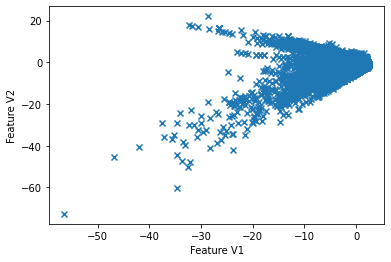

In [ ]:
#a.
#1.Pick two features: V1 and V2

#2.Scatter plot
import matplotlib.pyplot as plt

plt.scatter(X_train["V1"],X_train["V2"],marker="x");
plt.xlabel("Feature V1")
plt.ylabel("Feature V2")



Text(0, 0.5, 'Feature V2')

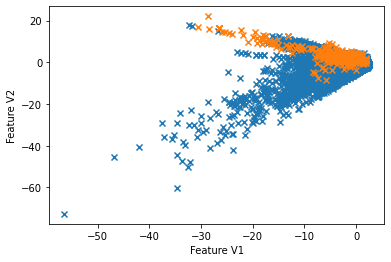

In [ ]:
#3.On the scatter plot color the training set based on their class (non-fraudulents blue and fraudulents red)

plt.scatter(X_train["V1"][y_train==0],X_train["V2"][y_train==0],marker="x");
plt.scatter(X_train["V1"][y_train==1],X_train["V2"][y_train==1],marker="x",cmap="red");
plt.xlabel("Feature V1")
plt.ylabel("Feature V2")



In [ ]:
#4.One Gaussian model is needed based on the scatter plot.

#5.Fit your Gaussian model on the training set (all samples).
gm=GaussianMixture(n_components=1)
gm.fit(X_train[["V1","V2"]])

#6.Compute AUC on both training and validation sets
#On trainning set:
p_train=gm.score_samples(X_train[["V1","V2"]])
fpr_train,tpr_train,_=roc_curve(y_train,-1*p_train)
print ("AUC of Gaussian Mixture on full training set of feature (V1 and V2)" , format( auc(fpr_train, tpr_train) , ".3f"))
#Validation set
p_val=gm.score_samples(X_val[["V1","V2"]])
fpr_val,tpr_val,_=roc_curve(y_val,-1*p_val)
print ("AUC of Gaussian Mixture on validation set of feature (V1 and V2)" , format( auc(fpr_val, tpr_val) , ".3f"))




AUC of Gaussian Mixture on full training set of feature (V1 and V2) 0.848
AUC of Gaussian Mixture on validation set of feature (V1 and V2) 0.857


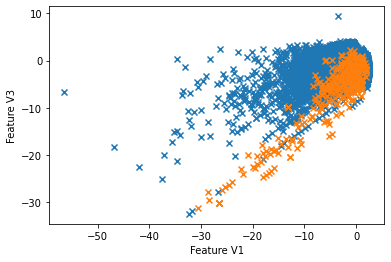

AUC of Gaussian Mixture on full training set of feature (V1 and V3) 0.867
AUC of Gaussian Mixture on validation set of feature (V1 and V3) 0.865


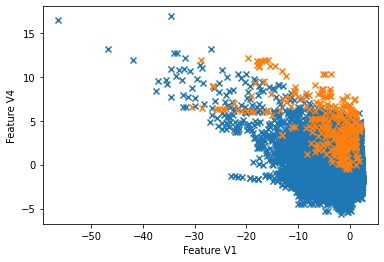

AUC of Gaussian Mixture on full training set of feature (V1 and V4) 0.892
AUC of Gaussian Mixture on validation set of feature (V1 and V4) 0.907


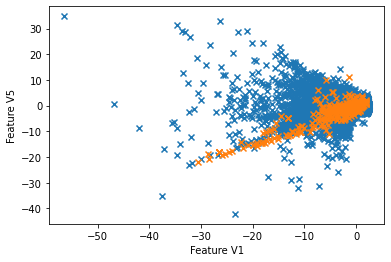

AUC of Gaussian Mixture on full training set of feature (V1 and V5) 0.765
AUC of Gaussian Mixture on validation set of feature (V1 and V5) 0.776


In [ ]:
#7.Pick 3 new pair of features and repeat steps 2 to 6.
#3 pairs: V1 and V3, V1 and V4, V1 and V5
#Pari1: V1 and V3
plt.scatter(X_train["V1"][y_train==0],X_train["V3"][y_train==0],marker="x");
plt.scatter(X_train["V1"][y_train==1],X_train["V3"][y_train==1],marker="x",cmap="red");
plt.xlabel("Feature V1")
plt.ylabel("Feature V3")
plt.show()

gm=GaussianMixture(n_components=1)
gm.fit(X_train[["V1","V3"]])

p_train=gm.score_samples(X_train[["V1","V3"]])
fpr_train,tpr_train,_=roc_curve(y_train,-1*p_train)
print ("AUC of Gaussian Mixture on full training set of feature (V1 and V3)" , format( auc(fpr_train, tpr_train) , ".3f"))

p_val=gm.score_samples(X_val[["V1","V3"]])
fpr_val,tpr_val,_=roc_curve(y_val,-1*p_val)
print ("AUC of Gaussian Mixture on validation set of feature (V1 and V3)" , format( auc(fpr_val, tpr_val) , ".3f"))
#Pari2: V1 and V4
plt.scatter(X_train[X_train["Class"]==0]["V1"],X_train[X_train["Class"]==0]["V4"],marker="x");
plt.scatter(X_train[X_train["Class"]==1]["V1"],X_train[X_train["Class"]==1]["V4"],marker="x",cmap="red");
plt.xlabel("Feature V1")
plt.ylabel("Feature V4")
plt.show()

gm=GaussianMixture(n_components=1)
gm.fit(X_train[["V1","V4"]])

p_train=gm.score_samples(X_train[["V1","V4"]])
fpr_train,tpr_train,_=roc_curve(y_train,-1*p_train)
print ("AUC of Gaussian Mixture on full training set of feature (V1 and V4)" , format( auc(fpr_train, tpr_train) , ".3f"))

p_val=gm.score_samples(X_val[["V1","V4"]])
fpr_val,tpr_val,_=roc_curve(y_val,-1*p_val)
print ("AUC of Gaussian Mixture on validation set of feature (V1 and V4)" , format( auc(fpr_val, tpr_val) , ".3f"))
#Pari3: V1 and V5
plt.scatter(X_train[X_train["Class"]==0]["V1"],X_train[X_train["Class"]==0]["V5"],marker="x");
plt.scatter(X_train[X_train["Class"]==1]["V1"],X_train[X_train["Class"]==1]["V5"],marker="x",cmap="red");
plt.xlabel("Feature V1")
plt.ylabel("Feature V5")
plt.show()

gm=GaussianMixture(n_components=1)
gm.fit(X_train[["V1","V5"]])

p_train=gm.score_samples(X_train[["V1","V5"]])
fpr_train,tpr_train,_=roc_curve(y_train,-1*p_train)
print ("AUC of Gaussian Mixture on full training set of feature (V1 and V5)" , format( auc(fpr_train, tpr_train) , ".3f"))

p_val=gm.score_samples(X_val[["V1","V5"]])
fpr_val,tpr_val,_=roc_curve(y_val,-1*p_val)
print ("AUC of Gaussian Mixture on validation set of feature (V1 and V5)" , format( auc(fpr_val, tpr_val) , ".3f"))

In [ ]:
#8.Pick the set with the highest AUC on the validation set
#The pair with highest AUC on validation set is feature pair(V1,V4)

#9.Find a threshold to maximize your F1 Score on the validation set
gm=GaussianMixture(n_components=1)
gm.fit(X_train[["V1","V4"]])

p_val=gm.score_samples(X_val[["V1","V4"]])
F1_max=0
threshold=0
for i in [1, 10, 20, 30,50,60,70,80,90,100,120,130,140,150,200,300]:
  
  tr=sorted(p_val)[i]
  F1_score=f1_score(y_val,p_val<tr)
  if i==1:
    F1_max=F1_score
    threshold=sorted(p_val)[1]
  else:
    if F1_max<=F1_score:
      F1_max=F1_score
      threshold=tr
  print('For k: ',i,'\t  threshold: ','%.3f'% tr ,'  F1 score: ', '%.3f' % F1_score)

print("The maximum F1 score for feature pair(V1,V4) is:",F1_max)
print("The optimal threshold is: ",threshold)

For k:  1 	  threshold:  -248.001   F1 score:  0.000
For k:  10 	  threshold:  -113.805   F1 score:  0.000
For k:  20 	  threshold:  -77.842   F1 score:  0.082
For k:  30 	  threshold:  -64.660   F1 score:  0.106
For k:  50 	  threshold:  -45.990   F1 score:  0.145
For k:  60 	  threshold:  -41.640   F1 score:  0.160
For k:  70 	  threshold:  -38.476   F1 score:  0.163
For k:  80 	  threshold:  -35.455   F1 score:  0.176
For k:  90 	  threshold:  -31.440   F1 score:  0.167
For k:  100 	  threshold:  -30.277   F1 score:  0.188
For k:  120 	  threshold:  -25.660   F1 score:  0.189
For k:  130 	  threshold:  -24.335   F1 score:  0.198
For k:  140 	  threshold:  -22.957   F1 score:  0.198
For k:  150 	  threshold:  -22.084   F1 score:  0.198
For k:  200 	  threshold:  -18.399   F1 score:  0.172
For k:  300 	  threshold:  -14.441   F1 score:  0.169
The maximum F1 score for feature pair(V1,V4) is: 0.1984126984126984
The optimal threshold is:  -22.083528232983003


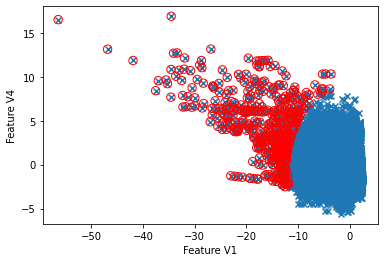

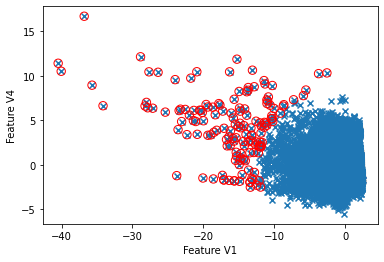

In [ ]:
#10.Plot two seperate figures (one for the training data and one for the validation data) similar to step 3 and put a circle around outliers based on your threshold (use the code of the similar figure in tutorial)
tr=-22.084
#Training set
gm=GaussianMixture(n_components=1)
gm.fit(X_train[["V1","V4"]])
p_train=gm.score_samples(X_train[["V1","V4"]])

plt.scatter(X_train["V1"],X_train["V4"],marker="x");
plt.xlabel("Feature V1")
plt.ylabel("Feature V4")

outliers=np.nonzero(p_train<tr)[0]
outlier_list=outliers.tolist()
plt.scatter(X_train.iloc[outlier_list]["V1"],X_train.iloc[outlier_list]["V4"],marker="o",facecolor= "none",edgecolor="r",s=70)
plt.show()
#Validation set
gm=GaussianMixture(n_components=1)
gm.fit(X_train[["V1","V4"]])
p_val=gm.score_samples(X_val[["V1","V4"]])

plt.scatter(X_val["V1"],X_val["V4"],marker="x");
plt.xlabel("Feature V1")
plt.ylabel("Feature V4")

outliers=np.nonzero(p_val<tr)[0]
outlier_list=outliers.tolist()
plt.scatter(X_val.iloc[outlier_list]["V1"],X_val.iloc[outlier_list]["V4"],marker="o",facecolor= "none",edgecolor="r",s=70)
plt.show()

In [ ]:
#Partb 3D plot
#1.Pick three features (say, f1, f2 and f3, you can choose the features with highest AUC scores from part 2.

#I choose V14, V17, V10(The top 3 AUC scores in part2)

#2.Repeat steps 2 to 6
#Scatter plot:



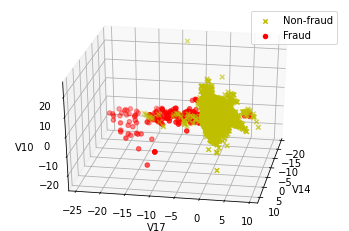

In [ ]:
###You can use the following function for 3D plotting in part b  ###

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

def plot_3d(X_train , y_train, f1, f2, f3, angle ):
  X_train_3f = pd.DataFrame(data = X_train,columns=[f1, f2,f3])
  fig = plt.figure()
  ax = plt.axes( projection='3d')
  ax.scatter3D(X_train_3f[f1][y_train==0], X_train_3f[f2][y_train==0], X_train_3f[f3][y_train==0], c='y', marker='x',label ='Non-fraud')
  ax.scatter3D(X_train_3f[f1][y_train==1], X_train_3f[f2][y_train==1], X_train_3f[f3][y_train==1], c='r', marker='o',label="Fraud")
  ax.set_xlabel(f1)
  ax.set_ylabel(f2)
  ax.set_zlabel(f3)
  plt.legend()
  ax.view_init(30, angle)
  plt.show()

plot_3d(X_train,y_train,"V14","V17","V10",10)

In [ ]:
#1 Gaussian model is needed
gm=GaussianMixture(n_components=1)
gm.fit(X_train[["V14","V17","V10"]])

#On trainning set:
p_train=gm.score_samples(X_train[["V14","V17","V10"]])
fpr_train,tpr_train,_=roc_curve(y_train,-1*p_train)
print ("AUC of Gaussian Mixture on full training set of feature (V14,V17,V10)" , format( auc(fpr_train, tpr_train) , ".3f"))
#Validation set
p_val=gm.score_samples(X_val[["V14","V17","V10"]])
fpr_val,tpr_val,_=roc_curve(y_val,-1*p_val)
print ("AUC of Gaussian Mixture on validation set of feature (V14,V17,V10)" , format( auc(fpr_val, tpr_val) , ".3f"))


AUC of Gaussian Mixture on full training set of feature (V14,V17,V10) 0.958
AUC of Gaussian Mixture on validation set of feature (V14,V17,V10) 0.965


In [ ]:
#Find a threshold to maximize your F1 Score on the validation set
F1_max=0
threshold=0
for i in [1, 10, 20, 30,50,60,70,80,90,100,120,130,140,150,200,300]:
  
  tr=sorted(p_val)[i]
  F1_score=f1_score(y_val,p_val<tr)
  if i==1:
    F1_max=F1_score
    threshold=sorted(p_val)[1]
  else:
    if F1_max<=F1_score:
      F1_max=F1_score
      threshold=tr
  print('For k: ',i,'\t  threshold: ','%.3f'% tr ,'  F1 score: ', '%.3f' % F1_score)

print("The maximum F1 score for feature pair(V14,V17,V10) is:",F1_max)
print("The optimal threshold is: ",threshold)

For k:  1 	  threshold:  -469.677   F1 score:  0.019
For k:  10 	  threshold:  -393.861   F1 score:  0.179
For k:  20 	  threshold:  -203.618   F1 score:  0.279
For k:  30 	  threshold:  -142.609   F1 score:  0.409
For k:  50 	  threshold:  -85.517   F1 score:  0.526
For k:  60 	  threshold:  -74.972   F1 score:  0.580
For k:  70 	  threshold:  -68.437   F1 score:  0.593
For k:  80 	  threshold:  -62.614   F1 score:  0.593
For k:  90 	  threshold:  -58.574   F1 score:  0.562
For k:  100 	  threshold:  -54.610   F1 score:  0.545
For k:  120 	  threshold:  -45.992   F1 score:  0.532
For k:  130 	  threshold:  -44.120   F1 score:  0.526
For k:  140 	  threshold:  -42.377   F1 score:  0.521
For k:  150 	  threshold:  -41.532   F1 score:  0.508
For k:  200 	  threshold:  -32.028   F1 score:  0.483
For k:  300 	  threshold:  -23.529   F1 score:  0.398
The maximum F1 score for feature pair(V14,V17,V10) is: 0.5934065934065933
The optimal threshold is:  -62.61400587535364


## **Part 4:  Two Gaussian model with single feature. [3 Marks]**
Now we will use two separate distributions for fraudulent and non-fraudulent transactions.
  1.  Fit a Gaussian distribution ($G_1$) on a feature of **non-fraudulent transactions** using ``sklearn.mixture.GaussianMixture`` when ``n_components=1``. **[0.5]**
  2. Fit another Gaussian distribution ($G_2$) on the same feature but for **fraudulent transactions** using ``sklearn.mixture.GaussianMixture`` when ``n_components=1``. **[0.5]**
  3. Compute the score samples ($S$) for both $G_1$ and $G_2$ on the **validation set** to get $S_1$ and $S_2$, respectively. **[0.5]**
  4. Find an optimal $c$ (a real number) that maximizes validation set F1 Score for a model such that if $S_1 < c \times S_2$, the transaction is classified as a fraud. For example, if $c=1$ we could say that if $S_2$ is greater than $S_1$, ($S_1$<$S_2$) then the transaction is a fraud (the transaction belongs to the $G_2$ distribution which represents fraudulent transactions). For start consider $c$ in $[0,10]$ with steps of 0.1, you can change this window in your experiments if needed. **[0.5]**The optimal c is 6.6 and the highest F1 score is 0.152 with V1 as the selected feature.
  5. Repeat the steps above for all the features. What is the best F1 Score, Precision and Recall that you get for training and validation? Which feature and what c? Show your results in a table. **[0.5]**
  According to the table after the code, the best F1 score for training set is 0.626, for validation set is 0.670, the best precision for training set is 0.637, for validation set is 0.719, the best recall for training set is 0.614, for validation set is 0.627, obtained at feature V17 and c=0.59
  6. Can we report AUC for this model? Why? **[0.5]**AUC cannot be reported for this model, because it is a mixture of two models, AUC cannot be computed.

In [ ]:
### YOUR CODE HERE ###
#Suppose I choose the single feature to be V1
X_train_nonfraud=X_train[y_train==0]
X_val_nonfraud=X_val[y_val==0]
y_train_nonfraud=y_train[y_train==0]
y_val_nonfraud=y_val[y_val==0]
X_test_nonfraud=X_test[y_test==0]
y_test_nonfraud=y_test[y_test==0]

X_train_fraud=X_train[y_train==1]
X_val_fraud=X_val[y_val==1]
y_train_fraud=y_train[y_train==1]
y_val_fraud=y_val[y_val==1]
X_test_fraud=X_test[y_test==1]
y_test_fraud=y_test[y_test==1]
#1.Fit a Gaussian distribution ( G1 ) on a feature of non-fraudulent transactions
G1=GaussianMixture(n_components=1)
G1.fit(X_train_nonfraud[["V1"]])
#2.Fit another Gaussian distribution ( G2 ) on the same feature but for fraudulent transactions
G2=GaussianMixture(n_components=1)
G2.fit(X_train_fraud[["V1"]])
#3.Compute the score samples ( S ) for both  G1  and  G2  on the validation set to get  S1  and  S2 , respectively
S1=G1.score_samples(np.array(X_val["V1"]).reshape(-1,1))
S2=G2.score_samples(np.array(X_val["V1"]).reshape(-1,1))

#4.Find an optimal  c  (a real number) that maximizes validation set F1 Score for a model such that if  S1<c×S2,the transaction is classified as a fraud.
c_opt=0.0
F1_max=0
for c in np.arange(0,10,0.1):
  if c==0.0:
    F1_score=f1_score(y_val,S1<c*S2)
    F1_max=F1_score
    c_opt=c
  else:
    F1_score=f1_score(y_val,S1<c*S2)
    if F1_score>=F1_max:
      F1_max=F1_score
      c_opt=c

print("The optimal c is: ",c_opt)
print("The corresponding F1_score is: ",F1_max)


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  "X does not have valid feature names, but"


The optimal c is:  6.6000000000000005
The corresponding F1_score is:  0.1523809523809524


In [ ]:
#5.Repeat the steps above for all the features.
F1_train_each_feature=[]
F1_val_each_feature=[]

Pre_train_each_feature=[]
Pre_val_each_feature=[]

Recall_train_each_feature=[]
Recall_val_each_feature=[]

c_opt_each_feature=[]
for column in X_train_fraud:
  if "V" in column: 
    G1=GaussianMixture(n_components=1)
    G1.fit(X_train_nonfraud[[column]])

    G2=GaussianMixture(n_components=1)
    G2.fit(X_train_fraud[[column]])

    S1_train=G1.score_samples(np.array(X_train[column]).reshape(-1,1))
    S2_train=G2.score_samples(np.array(X_train[column]).reshape(-1,1))

    S1_val=G1.score_samples(np.array(X_val[column]).reshape(-1,1))
    S2_val=G2.score_samples(np.array(X_val[column]).reshape(-1,1))

    c_opt=0
    F1_train_max=0
    F1_val_max=0
    Pre_train_max=0
    Pre_val_max=0
    Recall_train_max=0
    Recall_val_max=0
    for c in np.arange(0,10,0.1):
      F1_score_train=f1_score(y_train,S1_train<c*S2_train)
      F1_score_val=f1_score(y_val,S1_val<c*S2_val)

      precision_train=precision_score(y_train, S1_train<c*S2_train)
      recall_train = recall_score(y_train, S1_train<c*S2_train)

      precision_val=precision_score(y_val, S1_val<c*S2_val)
      recall_val = recall_score(y_val, S1_val<c*S2_val)

      if c==0.0:
        F1_val_max=F1_score_val
        F1_train_max=F1_score_train

        Pre_train_max=precision_train
        Pre_val_max=precision_val

        Recall_train_max=recall_train
        Recall_val_max=recall_val
        c_opt=c
      else:
        if F1_score_val>=F1_val_max:
          F1_val_max=F1_score_val
          F1_train_max=F1_score_train

          Pre_train_max=precision_train
          Pre_val_max=precision_val

          Recall_train_max=recall_train
          Recall_val_max=recall_val
          c_opt=c
          

    F1_train_each_feature.append(F1_train_max)
    F1_val_each_feature.append(F1_val_max)

    Pre_train_each_feature.append(Pre_train_max)
    Pre_val_each_feature.append(Pre_val_max)

    Recall_train_each_feature.append(Recall_train_max)
    Recall_val_each_feature.append(Recall_val_max)

    c_opt_each_feature.append(c_opt)


Tablevalues={}
Tablevalues["F1_train"]=F1_train_each_feature
Tablevalues["F1_val"]=F1_val_each_feature
Tablevalues["Precision_train"]=Pre_train_each_feature
Tablevalues["precision_val"]=Pre_val_each_feature
Tablevalues["Recall_train"]=Recall_train_each_feature
Tablevalues["Recall_val"]=Recall_val_each_feature
Tablevalues["c_optimal"]=c_opt_each_feature

table=pd.DataFrame.from_dict(Tablevalues,orient="index")
table.columns=fname
print(table)

  

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  "X does not have v

                       V1        V2        V3  ...       V26       V27       V28
F1_train         0.128440  0.127778  0.268714  ...  0.005102  0.054885  0.028071
F1_val           0.152381  0.175439  0.312139  ...  0.005155  0.054545  0.032520
Precision_train  0.126506  0.605263  0.351759  ...  0.002583  0.030394  0.014824
precision_val    0.148148  0.833333  0.380282  ...  0.002610  0.030405  0.017212
Recall_train     0.130435  0.071429  0.217391  ...  0.208075  0.282609  0.263975
Recall_val       0.156863  0.098039  0.264706  ...  0.205882  0.264706  0.294118
c_optimal        6.600000  5.900000  7.600000  ...  1.200000  2.900000  1.400000

[7 rows x 28 columns]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
sorted_table=table.sort_values(by='F1_val',axis=1)
print(sorted_table)

                      V13       V26       V24  ...       V14       V12       V17
F1_train         0.005560  0.005102  0.003692  ...  0.616766  0.677029  0.625592
F1_val           0.005075  0.005155  0.006515  ...  0.660194  0.662857  0.670157
Precision_train  0.002819  0.002583  0.001951  ...  0.595376  0.762646  0.636656
precision_val    0.002574  0.002610  0.003448  ...  0.653846  0.794521  0.719101
Recall_train     0.201863  0.208075  0.034161  ...  0.639752  0.608696  0.614907
Recall_val       0.176471  0.205882  0.058824  ...  0.666667  0.568627  0.627451
c_optimal        1.100000  1.200000  2.000000  ...  7.000000  4.500000  5.900000

[7 rows x 28 columns]


## **Part 5: Multivariate and Mixture of Gaussians Distribution [3 Marks]**
We now want to build an outlier detection model that performs well in terms of F1 score. To design your model, you can benefit from:

*   No restrictions on the number of features - use as few or as many as you want! (multivariate). 
*   To fit your model, you can take advantage of the Gaussian mixture model where you can set the number of components [help](https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html) .
*   You can choose to fit your Gaussians on non-fraudulent transactions or to both classes. 


It is up to you how to design your model. Try at least 10 different models and report the AUC for both training and validation sets (if applicable) and the best F1 score, Precision and Recall (after tuning the threshold) for both training and validation sets for each model. What kind of model works better? How many features are best (and which ones)? How many Gaussians? How many components? Summarize your findings with tables or plots. **[3]**
10 different models were evaluated, 2 Gaussian model with different number of features(single,two features,and three features) and component number were tried, 3 potential features(V12,V14,V17) were selected based on the value from Part 4.From the values in the summary table of all the evaluated models, model 10 (Two gaussian model, Multiple features(V12,V14,V17), single component for valid transaction and 3 components for fraudulent ones) has the best performance. 

**HINT !**

You might want to try a two gaussian model, multiple features, single component for valid transaction and multiple components for fraudulent ones! Why does it make sense to have multiple components for the fraudulent transactions?
Because fradulent transactions may have multiple separate 'clusters', so it makes sense to have multiple components for the fradulent transactions.

In [ ]:
### YOUR CODE HERE ###
#Model1:Two gaussian model, single feature(V14), single component for valid transaction and 2 components for fraudulent ones:

G1=GaussianMixture(n_components=1)
G1.fit(X_train_nonfraud[["V14"]])

G2=GaussianMixture(n_components=2)
G2.fit(X_train_fraud[["V14"]])

S1_train=G1.score_samples(np.array(X_train["V14"]).reshape(-1,1))
S2_train=G2.score_samples(np.array(X_train["V14"]).reshape(-1,1))

S1_val=G1.score_samples(np.array(X_val["V14"]).reshape(-1,1))
S2_val=G2.score_samples(np.array(X_val["V14"]).reshape(-1,1))

#Assuming the optimal c is obtained with c that maximizes F1 score on validation set

for c in np.arange(0,10,0.1):
  F1_score_train=f1_score(y_train,S1_train<c*S2_train)
  F1_score_val=f1_score(y_val,S1_val<c*S2_val)

  precision_train=precision_score(y_train, S1_train<c*S2_train)
  recall_train = recall_score(y_train, S1_train<c*S2_train)

  precision_val=precision_score(y_val, S1_val<c*S2_val)
  recall_val = recall_score(y_val, S1_val<c*S2_val)

  if c==0.0:
    F1_val_max=F1_score_val
    F1_train_max=F1_score_train

    Pre_train_max=precision_train
    Pre_val_max=precision_val

    Recall_train_max=recall_train
    Recall_val_max=recall_val
    c_opt=c
  else:
    
    if F1_score_val>=F1_val_max:
      F1_val_max=F1_score_val
      F1_train_max=F1_score_train

      Pre_train_max=precision_train
      Pre_val_max=precision_val

      Recall_train_max=recall_train
      Recall_val_max=recall_val
      c_opt=c
print("For model 1, the F1 score for training set is: ",F1_train_max)
print("For model 1, the F1 score for validation set is: ",F1_train_max)
print("For model 1, the precision for training set is: ",Pre_train_max)
print("For model 1, the precision for validation set is: ",Pre_val_max)
print("For model 1, the Recall for training set is: ",Recall_train_max)
print("For model 1, the Recall for validation set is: ",Recall_val_max)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  "X does not have valid feature names, but"


For model 1, the F1 score for training set is:  0.6184012066365008
For model 1, the F1 score for validation set is:  0.6184012066365008
For model 1, the precision for training set is:  0.6011730205278593
For model 1, the precision for validation set is:  0.6538461538461539
For model 1, the Recall for training set is:  0.6366459627329193
For model 1, the Recall for validation set is:  0.6666666666666666


In [ ]:
#Model2:Two gaussian model, single feature(V14), single component for valid transaction and 3 components for fraudulent ones:

G1=GaussianMixture(n_components=1)
G1.fit(X_train_nonfraud[["V14"]])

G2=GaussianMixture(n_components=3)
G2.fit(X_train_fraud[["V14"]])

S1_train=G1.score_samples(np.array(X_train["V14"]).reshape(-1,1))
S2_train=G2.score_samples(np.array(X_train["V14"]).reshape(-1,1))

S1_val=G1.score_samples(np.array(X_val["V14"]).reshape(-1,1))
S2_val=G2.score_samples(np.array(X_val["V14"]).reshape(-1,1))

#Assuming the optimal c is obtained with c that maximizes F1 score on validation set

for c in np.arange(0,10,0.1):
  F1_score_train=f1_score(y_train,S1_train<c*S2_train)
  F1_score_val=f1_score(y_val,S1_val<c*S2_val)

  precision_train=precision_score(y_train, S1_train<c*S2_train)
  recall_train = recall_score(y_train, S1_train<c*S2_train)

  precision_val=precision_score(y_val, S1_val<c*S2_val)
  recall_val = recall_score(y_val, S1_val<c*S2_val)

  if c==0.0:
    F1_val_max=F1_score_val
    F1_train_max=F1_score_train

    Pre_train_max=precision_train
    Pre_val_max=precision_val

    Recall_train_max=recall_train
    Recall_val_max=recall_val
    c_opt=c
  else:
    
    if F1_score_val>=F1_val_max:
      F1_val_max=F1_score_val
      F1_train_max=F1_score_train

      Pre_train_max=precision_train
      Pre_val_max=precision_val

      Recall_train_max=recall_train
      Recall_val_max=recall_val
      c_opt=c
print("For model 2, the F1 score for training set is: ",F1_train_max)
print("For model 2, the F1 score for validation set is: ",F1_train_max)
print("For model 2, the precision for training set is: ",Pre_train_max)
print("For model 2, the precision for validation set is: ",Pre_val_max)
print("For model 2, the Recall for training set is: ",Recall_train_max)
print("For model 2, the Recall for validation set is: ",Recall_val_max)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  "X does not have valid feature names, but"


For model 2, the F1 score for training set is:  0.6184012066365008
For model 2, the F1 score for validation set is:  0.6184012066365008
For model 2, the precision for training set is:  0.6011730205278593
For model 2, the precision for validation set is:  0.6538461538461539
For model 2, the Recall for training set is:  0.6366459627329193
For model 2, the Recall for validation set is:  0.6666666666666666


In [ ]:
#Model3:Two gaussian model, single feature(V17), single component for valid transaction and 2 components for fraudulent ones:

G1=GaussianMixture(n_components=1)
G1.fit(X_train_nonfraud[["V17"]])

G2=GaussianMixture(n_components=2)
G2.fit(X_train_fraud[["V17"]])

S1_train=G1.score_samples(np.array(X_train["V17"]).reshape(-1,1))
S2_train=G2.score_samples(np.array(X_train["V17"]).reshape(-1,1))

S1_val=G1.score_samples(np.array(X_val["V17"]).reshape(-1,1))
S2_val=G2.score_samples(np.array(X_val["V17"]).reshape(-1,1))

#Assuming the optimal c is obtained with c that maximizes F1 score on validation set

for c in np.arange(0,10,0.1):
  F1_score_train=f1_score(y_train,S1_train<c*S2_train)
  F1_score_val=f1_score(y_val,S1_val<c*S2_val)

  precision_train=precision_score(y_train, S1_train<c*S2_train)
  recall_train = recall_score(y_train, S1_train<c*S2_train)

  precision_val=precision_score(y_val, S1_val<c*S2_val)
  recall_val = recall_score(y_val, S1_val<c*S2_val)

  if c==0.0:
    F1_val_max=F1_score_val
    F1_train_max=F1_score_train

    Pre_train_max=precision_train
    Pre_val_max=precision_val

    Recall_train_max=recall_train
    Recall_val_max=recall_val
    c_opt=c
  else:
    
    if F1_score_val>=F1_val_max:
      F1_val_max=F1_score_val
      F1_train_max=F1_score_train

      Pre_train_max=precision_train
      Pre_val_max=precision_val

      Recall_train_max=recall_train
      Recall_val_max=recall_val
      c_opt=c
print("For model 3, the F1 score for training set is: ",F1_train_max)
print("For model 3, the F1 score for validation set is: ",F1_train_max)
print("For model 3, the precision for training set is: ",Pre_train_max)
print("For model 3, the precision for validation set is: ",Pre_val_max)
print("For model 3, the Recall for training set is: ",Recall_train_max)
print("For model 3, the Recall for validation set is: ",Recall_val_max)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  "X does not have valid feature names, but"


For model 3, the F1 score for training set is:  0.6524590163934426
For model 3, the F1 score for validation set is:  0.6524590163934426
For model 3, the precision for training set is:  0.6909722222222222
For model 3, the precision for validation set is:  0.7411764705882353
For model 3, the Recall for training set is:  0.6180124223602484
For model 3, the Recall for validation set is:  0.6176470588235294


In [ ]:
#Model4:Two gaussian model, single feature(V12), single component for valid transaction and 2 components for fraudulent ones:

G1=GaussianMixture(n_components=1)
G1.fit(X_train_nonfraud[["V12"]])

G2=GaussianMixture(n_components=2)
G2.fit(X_train_fraud[["V12"]])

S1_train=G1.score_samples(np.array(X_train["V12"]).reshape(-1,1))
S2_train=G2.score_samples(np.array(X_train["V12"]).reshape(-1,1))

S1_val=G1.score_samples(np.array(X_val["V12"]).reshape(-1,1))
S2_val=G2.score_samples(np.array(X_val["V12"]).reshape(-1,1))

#Assuming the optimal c is obtained with c that maximizes F1 score on validation set

for c in np.arange(0,10,0.1):
  F1_score_train=f1_score(y_train,S1_train<c*S2_train)
  F1_score_val=f1_score(y_val,S1_val<c*S2_val)

  precision_train=precision_score(y_train, S1_train<c*S2_train)
  recall_train = recall_score(y_train, S1_train<c*S2_train)

  precision_val=precision_score(y_val, S1_val<c*S2_val)
  recall_val = recall_score(y_val, S1_val<c*S2_val)

  if c==0.0:
    F1_val_max=F1_score_val
    F1_train_max=F1_score_train

    Pre_train_max=precision_train
    Pre_val_max=precision_val

    Recall_train_max=recall_train
    Recall_val_max=recall_val
    c_opt=c
  else:
    
    if F1_score_val>=F1_val_max:
      F1_val_max=F1_score_val
      F1_train_max=F1_score_train

      Pre_train_max=precision_train
      Pre_val_max=precision_val

      Recall_train_max=recall_train
      Recall_val_max=recall_val
      c_opt=c
print("For model 4, the F1 score for training set is: ",F1_train_max)
print("For model 4, the F1 score for validation set is: ",F1_train_max)
print("For model 4, the precision for training set is: ",Pre_train_max)
print("For model 4, the precision for validation set is: ",Pre_val_max)
print("For model 4, the Recall for training set is: ",Recall_train_max)
print("For model 4, the Recall for validation set is: ",Recall_val_max)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  "X does not have valid feature names, but"


For model 4, the F1 score for training set is:  0.6817391304347826
For model 4, the F1 score for validation set is:  0.6817391304347826
For model 4, the precision for training set is:  0.7747035573122529
For model 4, the precision for validation set is:  0.7945205479452054
For model 4, the Recall for training set is:  0.6086956521739131
For model 4, the Recall for validation set is:  0.5686274509803921


In [ ]:
#Model5:Two gaussian model, Multiple feature(V14,and V17), single component for valid transaction and 2 components for fraudulent ones:

G1=GaussianMixture(n_components=1)
G1.fit(X_train_nonfraud[["V14","V17"]])

G2=GaussianMixture(n_components=2)
G2.fit(X_train_fraud[["V14","V17"]])

S1_train=G1.score_samples(X_train[["V14","V17"]])
S2_train=G2.score_samples(X_train[["V14","V17"]])

S1_val=G1.score_samples(X_val[["V14","V17"]])
S2_val=G2.score_samples(X_val[["V14","V17"]])

#Assuming the optimal c is obtained with c that maximizes F1 score on validation set

for c in np.arange(0,10,0.1):
  F1_score_train=f1_score(y_train,S1_train<c*S2_train)
  F1_score_val=f1_score(y_val,S1_val<c*S2_val)

  precision_train=precision_score(y_train, S1_train<c*S2_train)
  recall_train = recall_score(y_train, S1_train<c*S2_train)

  precision_val=precision_score(y_val, S1_val<c*S2_val)
  recall_val = recall_score(y_val, S1_val<c*S2_val)

  if c==0.0:
    F1_val_max=F1_score_val
    F1_train_max=F1_score_train

    Pre_train_max=precision_train
    Pre_val_max=precision_val

    Recall_train_max=recall_train
    Recall_val_max=recall_val
    c_opt=c
  else:
    
    if F1_score_val>=F1_val_max:
      F1_val_max=F1_score_val
      F1_train_max=F1_score_train

      Pre_train_max=precision_train
      Pre_val_max=precision_val

      Recall_train_max=recall_train
      Recall_val_max=recall_val
      c_opt=c
print("For model 5, the F1 score for training set is: ",F1_train_max)
print("For model 5, the F1 score for validation set is: ",F1_train_max)
print("For model 5, the precision for training set is: ",Pre_train_max)
print("For model 5, the precision for validation set is: ",Pre_val_max)
print("For model 5, the Recall for training set is: ",Recall_train_max)
print("For model 5, the Recall for validation set is: ",Recall_val_max)

For model 5, the F1 score for training set is:  0.746218487394958
For model 5, the F1 score for validation set is:  0.746218487394958
For model 5, the precision for training set is:  0.8131868131868132
For model 5, the precision for validation set is:  0.8860759493670886
For model 5, the Recall for training set is:  0.6894409937888198
For model 5, the Recall for validation set is:  0.6862745098039216


In [ ]:
#Model6:Two gaussian model, Multiple feature(V14,and V17), single component for valid transaction and 3 components for fraudulent ones:

G1=GaussianMixture(n_components=1)
G1.fit(X_train_nonfraud[["V14","V17"]])

G2=GaussianMixture(n_components=3)
G2.fit(X_train_fraud[["V14","V17"]])

S1_train=G1.score_samples(X_train[["V14","V17"]])
S2_train=G2.score_samples(X_train[["V14","V17"]])

S1_val=G1.score_samples(X_val[["V14","V17"]])
S2_val=G2.score_samples(X_val[["V14","V17"]])

#Assuming the optimal c is obtained with c that maximizes F1 score on validation set

for c in np.arange(0,10,0.1):
  F1_score_train=f1_score(y_train,S1_train<c*S2_train)
  F1_score_val=f1_score(y_val,S1_val<c*S2_val)

  precision_train=precision_score(y_train, S1_train<c*S2_train)
  recall_train = recall_score(y_train, S1_train<c*S2_train)

  precision_val=precision_score(y_val, S1_val<c*S2_val)
  recall_val = recall_score(y_val, S1_val<c*S2_val)

  if c==0.0:
    F1_val_max=F1_score_val
    F1_train_max=F1_score_train

    Pre_train_max=precision_train
    Pre_val_max=precision_val

    Recall_train_max=recall_train
    Recall_val_max=recall_val
    c_opt=c
  else:
    
    if F1_score_val>=F1_val_max:
      F1_val_max=F1_score_val
      F1_train_max=F1_score_train

      Pre_train_max=precision_train
      Pre_val_max=precision_val

      Recall_train_max=recall_train
      Recall_val_max=recall_val
      c_opt=c
print("For model 6, the F1 score for training set is: ",F1_train_max)
print("For model 6, the F1 score for validation set is: ",F1_train_max)
print("For model 6, the precision for training set is: ",Pre_train_max)
print("For model 6, the precision for validation set is: ",Pre_val_max)
print("For model 6, the Recall for training set is: ",Recall_train_max)
print("For model 6, the Recall for validation set is: ",Recall_val_max)

For model 6, the F1 score for training set is:  0.7389937106918238
For model 6, the F1 score for validation set is:  0.7389937106918238
For model 6, the precision for training set is:  0.7484076433121019
For model 6, the precision for validation set is:  0.8241758241758241
For model 6, the Recall for training set is:  0.7298136645962733
For model 6, the Recall for validation set is:  0.7352941176470589


In [ ]:
#Model7:Two gaussian model, Multiple feature(V14,and V12), single component for valid transaction and 2 components for fraudulent ones:

G1=GaussianMixture(n_components=1)
G1.fit(X_train_nonfraud[["V14","V12"]])

G2=GaussianMixture(n_components=2)
G2.fit(X_train_fraud[["V14","V12"]])

S1_train=G1.score_samples(X_train[["V14","V12"]])
S2_train=G2.score_samples(X_train[["V14","V12"]])

S1_val=G1.score_samples(X_val[["V14","V12"]])
S2_val=G2.score_samples(X_val[["V14","V12"]])

#Assuming the optimal c is obtained with c that maximizes F1 score on validation set

for c in np.arange(0,10,0.1):
  F1_score_train=f1_score(y_train,S1_train<c*S2_train)
  F1_score_val=f1_score(y_val,S1_val<c*S2_val)

  precision_train=precision_score(y_train, S1_train<c*S2_train)
  recall_train = recall_score(y_train, S1_train<c*S2_train)

  precision_val=precision_score(y_val, S1_val<c*S2_val)
  recall_val = recall_score(y_val, S1_val<c*S2_val)

  if c==0.0:
    F1_val_max=F1_score_val
    F1_train_max=F1_score_train

    Pre_train_max=precision_train
    Pre_val_max=precision_val

    Recall_train_max=recall_train
    Recall_val_max=recall_val
    c_opt=c
  else:
    
    if F1_score_val>=F1_val_max:
      F1_val_max=F1_score_val
      F1_train_max=F1_score_train

      Pre_train_max=precision_train
      Pre_val_max=precision_val

      Recall_train_max=recall_train
      Recall_val_max=recall_val
      c_opt=c
print("For model 7, the F1 score for training set is: ",F1_train_max)
print("For model 7, the F1 score for validation set is: ",F1_train_max)
print("For model 7, the precision for training set is: ",Pre_train_max)
print("For model 7, the precision for validation set is: ",Pre_val_max)
print("For model 7, the Recall for training set is: ",Recall_train_max)
print("For model 7, the Recall for validation set is: ",Recall_val_max)

For model 7, the F1 score for training set is:  0.739770867430442
For model 7, the F1 score for validation set is:  0.739770867430442
For model 7, the precision for training set is:  0.7820069204152249
For model 7, the precision for validation set is:  0.8275862068965517
For model 7, the Recall for training set is:  0.7018633540372671
For model 7, the Recall for validation set is:  0.7058823529411765


In [ ]:
#Model8:Two gaussian model, Multiple feature(V12,and V17), single component for valid transaction and 2 components for fraudulent ones:

G1=GaussianMixture(n_components=1)
G1.fit(X_train_nonfraud[["V12","V17"]])

G2=GaussianMixture(n_components=2)
G2.fit(X_train_fraud[["V12","V17"]])

S1_train=G1.score_samples(X_train[["V12","V17"]])
S2_train=G2.score_samples(X_train[["V12","V17"]])

S1_val=G1.score_samples(X_val[["V12","V17"]])
S2_val=G2.score_samples(X_val[["V12","V17"]])

#Assuming the optimal c is obtained with c that maximizes F1 score on validation set

for c in np.arange(0,10,0.1):
  F1_score_train=f1_score(y_train,S1_train<c*S2_train)
  F1_score_val=f1_score(y_val,S1_val<c*S2_val)

  precision_train=precision_score(y_train, S1_train<c*S2_train)
  recall_train = recall_score(y_train, S1_train<c*S2_train)

  precision_val=precision_score(y_val, S1_val<c*S2_val)
  recall_val = recall_score(y_val, S1_val<c*S2_val)

  if c==0.0:
    F1_val_max=F1_score_val
    F1_train_max=F1_score_train

    Pre_train_max=precision_train
    Pre_val_max=precision_val

    Recall_train_max=recall_train
    Recall_val_max=recall_val
    c_opt=c
  else:
    
    if F1_score_val>=F1_val_max:
      F1_val_max=F1_score_val
      F1_train_max=F1_score_train

      Pre_train_max=precision_train
      Pre_val_max=precision_val

      Recall_train_max=recall_train
      Recall_val_max=recall_val
      c_opt=c
print("For model 8, the F1 score for training set is: ",F1_train_max)
print("For model 8, the F1 score for validation set is: ",F1_train_max)
print("For model 8, the precision for training set is: ",Pre_train_max)
print("For model 8, the precision for validation set is: ",Pre_val_max)
print("For model 8, the Recall for training set is: ",Recall_train_max)
print("For model 8, the Recall for validation set is: ",Recall_val_max)

For model 8, the F1 score for training set is:  0.6941896024464832
For model 8, the F1 score for validation set is:  0.6941896024464832
For model 8, the precision for training set is:  0.6837349397590361
For model 8, the precision for validation set is:  0.7419354838709677
For model 8, the Recall for training set is:  0.7049689440993789
For model 8, the Recall for validation set is:  0.6764705882352942


In [ ]:
#Model9:Two gaussian model, Multiple feature(V12, V14,and V17), single component for valid transaction and 2 components for fraudulent ones:

G1=GaussianMixture(n_components=1)
G1.fit(X_train_nonfraud[["V12","V14","V17"]])

G2=GaussianMixture(n_components=2)
G2.fit(X_train_fraud[["V12","V14","V17"]])

S1_train=G1.score_samples(X_train[["V12","V14","V17"]])
S2_train=G2.score_samples(X_train[["V12","V14","V17"]])

S1_val=G1.score_samples(X_val[["V12","V14","V17"]])
S2_val=G2.score_samples(X_val[["V12","V14","V17"]])

#Assuming the optimal c is obtained with c that maximizes F1 score on validation set

for c in np.arange(0,10,0.1):
  F1_score_train=f1_score(y_train,S1_train<c*S2_train)
  F1_score_val=f1_score(y_val,S1_val<c*S2_val)

  precision_train=precision_score(y_train, S1_train<c*S2_train)
  recall_train = recall_score(y_train, S1_train<c*S2_train)

  precision_val=precision_score(y_val, S1_val<c*S2_val)
  recall_val = recall_score(y_val, S1_val<c*S2_val)

  if c==0.0:
    F1_val_max=F1_score_val
    F1_train_max=F1_score_train

    Pre_train_max=precision_train
    Pre_val_max=precision_val

    Recall_train_max=recall_train
    Recall_val_max=recall_val
    c_opt=c
  else:
    
    if F1_score_val>=F1_val_max:
      F1_val_max=F1_score_val
      F1_train_max=F1_score_train

      Pre_train_max=precision_train
      Pre_val_max=precision_val

      Recall_train_max=recall_train
      Recall_val_max=recall_val
      c_opt=c
print("For model 9, the F1 score for training set is: ",F1_train_max)
print("For model 9, the F1 score for validation set is: ",F1_train_max)
print("For model 9, the precision for training set is: ",Pre_train_max)
print("For model 9, the precision for validation set is: ",Pre_val_max)
print("For model 9, the Recall for training set is: ",Recall_train_max)
print("For model 9, the Recall for validation set is: ",Recall_val_max)

For model 9, the F1 score for training set is:  0.7646076794657762
For model 9, the F1 score for validation set is:  0.7646076794657762
For model 9, the precision for training set is:  0.8267148014440433
For model 9, the precision for validation set is:  0.8795180722891566
For model 9, the Recall for training set is:  0.7111801242236024
For model 9, the Recall for validation set is:  0.7156862745098039


In [ ]:
#Model10:Two gaussian model, Multiple feature(V12, V14,and V17), single component for valid transaction and 3 components for fraudulent ones:

G1=GaussianMixture(n_components=1)
G1.fit(X_train_nonfraud[["V12","V14","V17"]])

G2=GaussianMixture(n_components=3)
G2.fit(X_train_fraud[["V12","V14","V17"]])

S1_train=G1.score_samples(X_train[["V12","V14","V17"]])
S2_train=G2.score_samples(X_train[["V12","V14","V17"]])

S1_val=G1.score_samples(X_val[["V12","V14","V17"]])
S2_val=G2.score_samples(X_val[["V12","V14","V17"]])

#Assuming the optimal c is obtained with c that maximizes F1 score on validation set

for c in np.arange(0,10,0.1):
  F1_score_train=f1_score(y_train,S1_train<c*S2_train)
  F1_score_val=f1_score(y_val,S1_val<c*S2_val)

  precision_train=precision_score(y_train, S1_train<c*S2_train)
  recall_train = recall_score(y_train, S1_train<c*S2_train)

  precision_val=precision_score(y_val, S1_val<c*S2_val)
  recall_val = recall_score(y_val, S1_val<c*S2_val)

  if c==0.0:
    F1_val_max=F1_score_val
    F1_train_max=F1_score_train

    Pre_train_max=precision_train
    Pre_val_max=precision_val

    Recall_train_max=recall_train
    Recall_val_max=recall_val
    c_opt=c
  else:
    
    if F1_score_val>=F1_val_max:
      F1_val_max=F1_score_val
      F1_train_max=F1_score_train

      Pre_train_max=precision_train
      Pre_val_max=precision_val

      Recall_train_max=recall_train
      Recall_val_max=recall_val
      c_opt=c
print("For model 10, the F1 score for training set is: ",F1_train_max)
print("For model 10, the F1 score for validation set is: ",F1_train_max)
print("For model 10, the precision for training set is: ",Pre_train_max)
print("For model 10, the precision for validation set is: ",Pre_val_max)
print("For model 10, the Recall for training set is: ",Recall_train_max)
print("For model 10, the Recall for validation set is: ",Recall_val_max)

For model 10, the F1 score for training set is:  0.7674796747967481
For model 10, the F1 score for validation set is:  0.7674796747967481
For model 10, the precision for training set is:  0.8054607508532423
For model 10, the precision for validation set is:  0.8823529411764706
For model 10, the Recall for training set is:  0.7329192546583851
For model 10, the Recall for validation set is:  0.7352941176470589


In [ ]:
#Summarizing table

from prettytable import PrettyTable 
  
# Specify the Column Names while initializing the Table 
Summry_Table = PrettyTable(["Model number","Model description","F1score_training", "F1score_validation", "precision_training", "precision_validation","recall_training","recall_validation"])

Summry_Table.add_row(["Model1", "Two gaussian model, single feature(V14), single component for valid transaction and 2 components for fraudulent ones","0.6180", "0.6184", "0.6012","0.6538","0.6366","0.6666"]) 
Summry_Table.add_row(["Model2", "Two gaussian model, single feature(V14), single component for valid transaction and 3 components for fraudulent ones","0.6180", "0.6184", "0.6012","0.6538","0.6366","0.6666"])
Summry_Table.add_row(["Model3", "Two gaussian model, single feature(V17), single component for valid transaction and 2 components for fraudulent ones","0.6525", "0.6525", "0.6910","0.7412","0.6180","0.6176"])
Summry_Table.add_row(["Model4", "Two gaussian model, single feature(V12), single component for valid transaction and 2 components for fraudulent ones","0.6817", "0.6817", "0.7747","0.7945","0.6087","0.5686"])
Summry_Table.add_row(["Model5", "Two gaussian model, Multiple features(V14,V17), single component for valid transaction and 2 components for fraudulent ones","0.7462", "0.7462", "0.8132","0.8861","0.6894","0.6863"])
Summry_Table.add_row(["Model6", "Two gaussian model, Multiple features(V14,V17), single component for valid transaction and 3 components for fraudulent ones","0.7390", "0.7390", "0.7484","0.8242","0.7298","0.7353"])
Summry_Table.add_row(["Model7", "Two gaussian model, Multiple features(V14,V12), single component for valid transaction and 2 components for fraudulent ones","0.7398", "0.7398", "0.7820","0.8276","0.7019","0.7059"])
Summry_Table.add_row(["Model8", "Two gaussian model, Multiple features(V12,V17), single component for valid transaction and 2 components for fraudulent ones","0.6919", "0.6942", "0.6837","0.7419","0.7050","0.6765"])
Summry_Table.add_row(["Model9", "Two gaussian model, Multiple features(V12,V14,V17), single component for valid transaction and 2 components for fraudulent ones","0.7646", "0.7646", "0.8267","0.8795","0.7112","0.7157"])
Summry_Table.add_row(["Model10", "Two gaussian model, Multiple features(V12,V14,V17), single component for valid transaction and 3 components for fraudulent ones","0.7675", "0.7675", "0.8055","0.8824","0.7329","0.7353"])

print(Summry_Table)


+--------------+---------------------------------------------------------------------------------------------------------------------------------+------------------+--------------------+--------------------+----------------------+-----------------+-------------------+
| Model number |                                                        Model description                                                        | F1score_training | F1score_validation | precision_training | precision_validation | recall_training | recall_validation |
+--------------+---------------------------------------------------------------------------------------------------------------------------------+------------------+--------------------+--------------------+----------------------+-----------------+-------------------+
|    Model1    |       Two gaussian model, single feature(V14), single component for valid transaction and 2 components for fraudulent ones      |      0.6180      |       0.6184       |       

In [ ]:
#From the values in the summary table of all the evaluated models, model 10 (Two gaussian model, Multiple features(V12,V14,V17), single component for valid transaction and 3 components for fraudulent ones) has the
#best performance

## **Part 6: Evaluating performance on test set: [1 Mark]**
**Which model worked better?** Pick your best model among all models and apply it to your test set. Report the F1 Score, Precision and Recall on the test set. **[1]**


In [ ]:
### YOUR CODE HERE ###
#Model10:Two gaussian model, Multiple feature(V12, V14,and V17), single component for valid transaction and 3 components for fraudulent ones:

G1=GaussianMixture(n_components=1)
G1.fit(X_train_nonfraud[["V12","V14","V17"]])

G2=GaussianMixture(n_components=3)
G2.fit(X_train_fraud[["V12","V14","V17"]])

S1_test=G1.score_samples(X_test[["V12","V14","V17"]])
S2_test=G2.score_samples(X_test[["V12","V14","V17"]])

#Assuming the optimal c is obtained with c that maximizes F1 score on validation set

for c in np.arange(0,10,0.1):
  F1_score_test=f1_score(y_test,S1_test<c*S2_test)

  precision_test=precision_score(y_test, S1_test<c*S2_test)
  recall_test = recall_score(y_test, S1_test<c*S2_test)

 

  if c==0.0:
    F1_test_max=F1_score_test
    Pre_test_max=precision_test
    Recall_test_max=recall_test

    c_opt=c
  else:
    
    if F1_score_test>=F1_test_max:
      F1_test_max=F1_score_test
      Pre_test_max=precision_test
      Recall_test_max=recall_test

      c_opt=c

print("For model 10, the F1 score for test set is: ",F1_test_max)
print("For model 10, the precision for test set is: ",Pre_test_max)
print("For model 10, the Recall for test set is: ",Recall_test_max)

For model 10, the F1 score for test set is:  0.8244274809160305
For model 10, the precision for test set is:  0.8571428571428571
For model 10, the Recall for test set is:  0.7941176470588235
